In [21]:
import os
import pandas as pd

FILE_PREFIX = "IndicatorsExport"
FILE_EXT = ".csv"
# 文件数量（从 IndicatorsExport.csv 到 IndicatorsExport (21).csv 共 22 个）
NUM_FILES = 22

CURRENT_DIR = os.getcwd()
SAVE_AS_NEW_FILES = True
NEW_FILE_SUFFIX = "_processed" + FILE_EXT


print("--- 开始CSV文件预处理 ---")
print(f"当前工作目录: {CURRENT_DIR}")
print(f"是否保存为新文件: {SAVE_AS_NEW_FILES}")
if SAVE_AS_NEW_FILES:
    print(f"新文件后缀: {NEW_FILE_SUFFIX}")
else:
    print("警告: 正在直接覆盖原始文件！请确保您已备份！")
print("-" * 40)

def preprocess_single_csv(file_path, output_path):
    try:
        # 读取所有行
        with open(file_path, 'r', encoding='latin1') as f_in:
            lines = f_in.readlines()

        if len(lines) < 2:
            print(f"  警告: 文件 '{file_path}' 行数不足2行，无法进行预处理。跳过。")
            return False

        # 跳过第一行
        header_line = lines[1].strip() # 获取原始的第二行作为新的标题行
        data_lines = lines[2:]        # 从第三行开始是数据

        # 在新的标题行第一列添加 'Rank'
        if header_line.startswith('\t'): # 如果第一列为空（以制表符开头）
            modified_header_line = "Rank" + header_line
        else: # 如果第一列不为空，可能没有列名或有编号，为了安全，直接插入
            modified_header_line = "Rank\t" + header_line # 假设是制表符分隔
        
        # 将处理后的内容写入新文件
        with open(output_path, 'w', encoding='latin1') as f_out:
            f_out.write(modified_header_line + "\n")
            f_out.writelines(data_lines)
        
        print(f"  成功处理 '{os.path.basename(file_path)}' -> '{os.path.basename(output_path)}'")
        return True

    except UnicodeDecodeError:
        print(f"  错误: 文件 '{file_path}' 编码问题。尝试 'latin1' 失败。可能需要手动检查文件编码。")
        return False
    except Exception as e:
        print(f"  处理文件 '{file_path}' 时发生未知错误: {e}")
        return False

# 遍历所有文件并进行预处理
for i in range(NUM_FILES):
    if i == 0:
        original_file_name = f"{FILE_PREFIX}{FILE_EXT}"
    else:
        original_file_name = f"{FILE_PREFIX} ({i}){FILE_EXT}"
    
    original_file_path = os.path.join(CURRENT_DIR, original_file_name)

    if SAVE_AS_NEW_FILES:
        # 新文件名为原文件名（不含扩展名）加上 _processed.csv
        base_name, _ = os.path.splitext(original_file_name)
        processed_file_name = base_name + NEW_FILE_SUFFIX
        processed_file_path = os.path.join(CURRENT_DIR, processed_file_name)
    else:
        processed_file_path = original_file_path 

    if os.path.exists(original_file_path):
        preprocess_single_csv(original_file_path, processed_file_path)
    else:
        print(f"文件 '{original_file_name}' 不存在，跳过。")

print("-" * 40)
print("CSV文件预处理完成。")
if SAVE_AS_NEW_FILES:
    print("请检查当前目录下的新文件，它们将以 '_processed.csv' 结尾。")


--- 开始CSV文件预处理 ---
当前工作目录: D:\DataEngineering\第三次作业10235501456刘子阳
是否保存为新文件: True
新文件后缀: _processed.csv
----------------------------------------
  成功处理 'IndicatorsExport.csv' -> 'IndicatorsExport_processed.csv'
  成功处理 'IndicatorsExport (1).csv' -> 'IndicatorsExport (1)_processed.csv'
  成功处理 'IndicatorsExport (2).csv' -> 'IndicatorsExport (2)_processed.csv'
  成功处理 'IndicatorsExport (3).csv' -> 'IndicatorsExport (3)_processed.csv'
  成功处理 'IndicatorsExport (4).csv' -> 'IndicatorsExport (4)_processed.csv'
  成功处理 'IndicatorsExport (5).csv' -> 'IndicatorsExport (5)_processed.csv'
  成功处理 'IndicatorsExport (6).csv' -> 'IndicatorsExport (6)_processed.csv'
  成功处理 'IndicatorsExport (7).csv' -> 'IndicatorsExport (7)_processed.csv'
  成功处理 'IndicatorsExport (8).csv' -> 'IndicatorsExport (8)_processed.csv'
  成功处理 'IndicatorsExport (9).csv' -> 'IndicatorsExport (9)_processed.csv'
  成功处理 'IndicatorsExport (10).csv' -> 'IndicatorsExport (10)_processed.csv'
  成功处理 'IndicatorsExport (11).csv' -> 'Indicator

--- 华东师范大学学科竞争力数据分析 ---
目标大学: EAST CHINA NORMAL UNIVERSITY
分析学科数量: 22
正在读取文件: 处理后的文件
----------------------------------------
正在处理学科: Agricultural Sciences (文件: IndicatorsExport_processed.csv)...
  在 Agricultural Sciences (文件: IndicatorsExport_processed.csv) 中找到 EAST CHINA NORMAL UNIVERSITY，排名: 845
正在处理学科: Biology & Biochemistry (文件: IndicatorsExport (1)_processed.csv)...
  在 Biology & Biochemistry (文件: IndicatorsExport (1)_processed.csv) 中找到 EAST CHINA NORMAL UNIVERSITY，排名: 721
正在处理学科: Chemistry (文件: IndicatorsExport (2)_processed.csv)...
  在 Chemistry (文件: IndicatorsExport (2)_processed.csv) 中找到 EAST CHINA NORMAL UNIVERSITY，排名: 90
正在处理学科: Clinical Medicine (文件: IndicatorsExport (3)_processed.csv)...
  在 Clinical Medicine (文件: IndicatorsExport (3)_processed.csv) 中找到 EAST CHINA NORMAL UNIVERSITY，排名: 2852
正在处理学科: Computer Science (文件: IndicatorsExport (4)_processed.csv)...
  在 Computer Science (文件: IndicatorsExport (4)_processed.csv) 中找到 EAST CHINA NORMAL UNIVERSITY，排名: 207
正在处理学科: Econ

,Discipline,On_List,Rank,Web of Science Documents,Cites,Cites/Paper,Top Papers,Total_Institutions_in_List
0,Agricultural Sciences,True,845.0,346.0,6513.0,18.82,4.0,1381
1,Biology & Biochemistry,True,721.0,897.0,20837.0,23.23,18.0,1649
2,Chemistry,True,90.0,5420.0,164390.0,30.33,157.0,2141
3,Clinical Medicine,True,2852.0,940.0,16875.0,17.95,12.0,6754
4,Computer Science,True,207.0,1803.0,22336.0,12.39,25.0,863
5,Economics & Business,False,NaN,NaN,NaN,NaN,NaN,543
6,Engineering,True,317.0,2567.0,55450.0,21.60,86.0,2787
7,Environment/Ecology,True,130.0,2941.0,92088.0,31.31,101.0,2066
8,Geosciences,True,275.0,1850.0,42158.0,22.79,38.0,1175
9,Immunology,False,NaN,NaN,NaN,NaN,NaN,1177



--- 关键指标概览 ---
在 22 个分析学科中，华东师范大学有 17 个学科上榜，5 个学科未上榜。

--- 华东师范大学上榜学科详细数据 ---


,Discipline,Rank,Total_Institutions_in_List,Web of Science Documents,Cites,Cites/Paper,Top Papers
2,Chemistry,90.0,2141,5420.0,164390.0,30.33,157.0
11,Mathematics,115.0,395,2019.0,11984.0,5.94,22.0
7,Environment/Ecology,130.0,2066,2941.0,92088.0,31.31,101.0
10,Materials Science,196.0,1580,2720.0,93969.0,34.55,57.0
4,Computer Science,207.0,863,1803.0,22336.0,12.39,25.0
8,Geosciences,275.0,1175,1850.0,42158.0,22.79,38.0
20,"Social Sciences, General",314.0,2407,2176.0,27524.0,12.65,51.0
6,Engineering,317.0,2787,2567.0,55450.0,21.60,86.0
18,Plant & Animal Science,395.0,1950,1375.0,21843.0,15.89,26.0
19,Psychiatry/Psychology,467.0,1147,1460.0,15243.0,10.44,7.0



排名最优学科：'Chemistry'，在该学科中排名第 90.0 位 (总计 2141 个机构)。
  WOS文档数: 5420.0, 引用数: 164390.0, 篇均引用: 30.33, 高被引论文数: 157.0

篇均引用最高学科：'Molecular Biology & Genetics'，篇均引用达到 38.66。
  排名: 867.0 (总计 1169 个机构), WOS文档数: 532.0, 引用数: 20568.0, 高被引论文数: 6.0

高被引论文数最多学科：'Chemistry'，高被引论文数达到 157.0 篇。
  排名: 90.0 (总计 2141 个机构), WOS文档数: 5420.0, 引用数: 164390.0, 篇均引用: 30.33

--- 正在生成可视化图表... ---


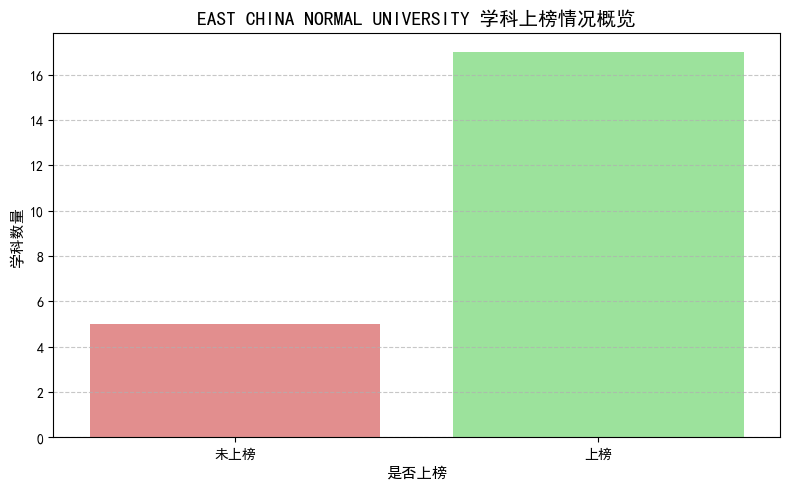

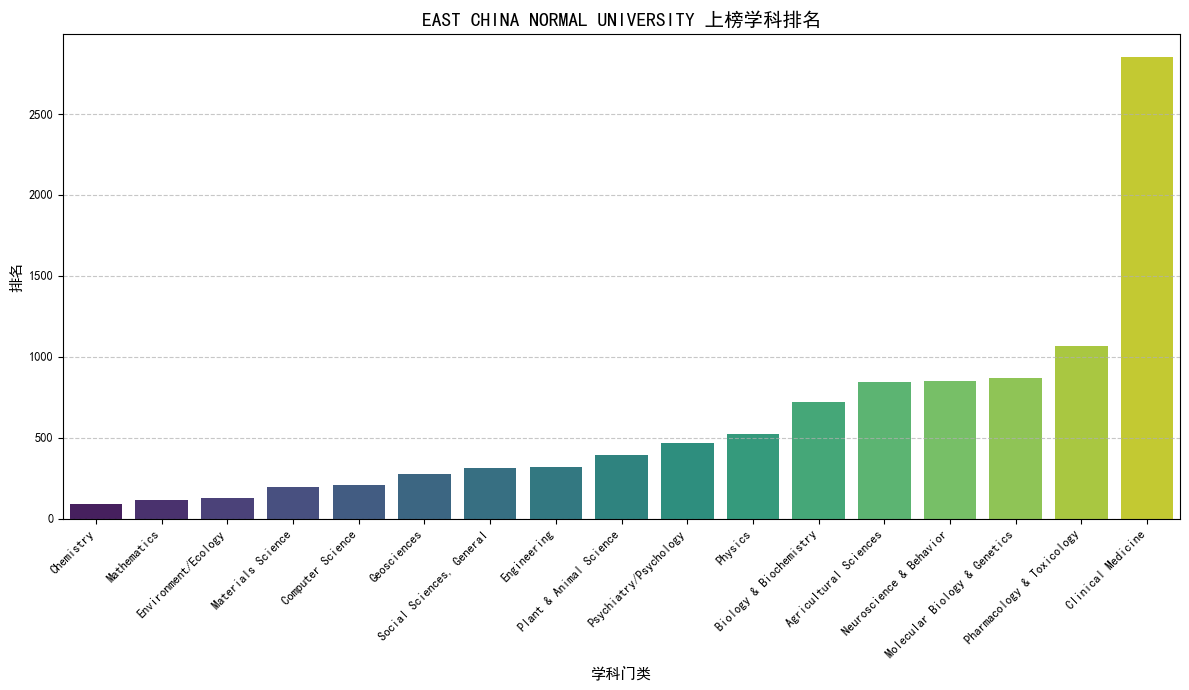

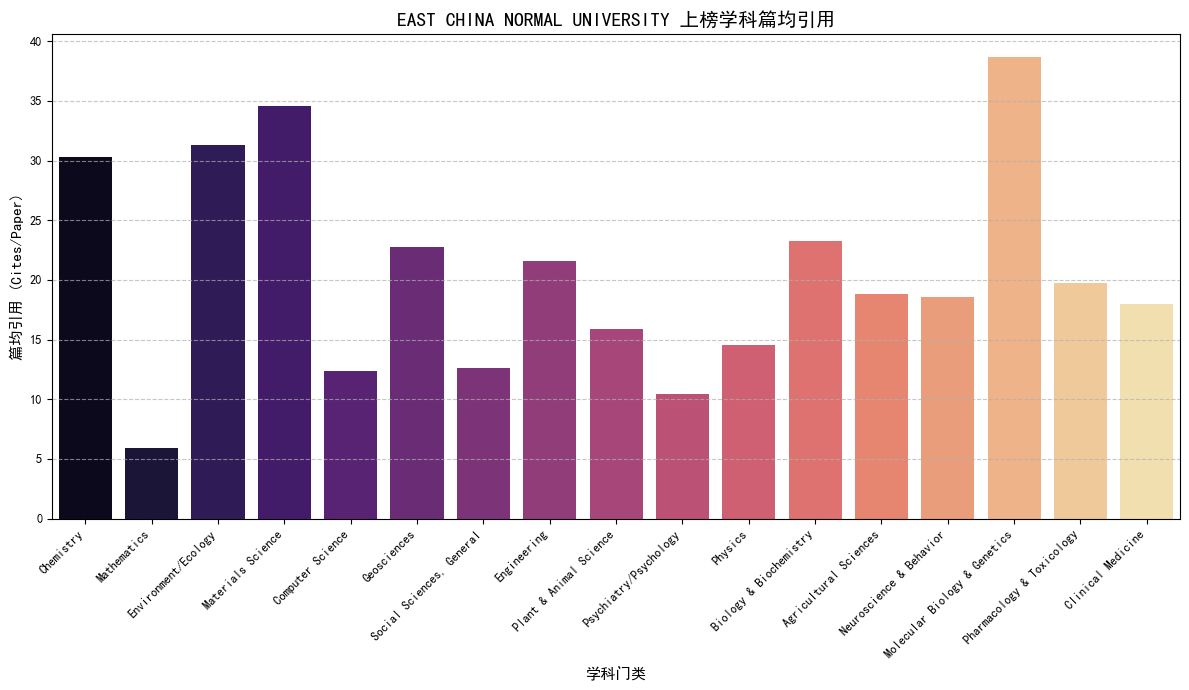

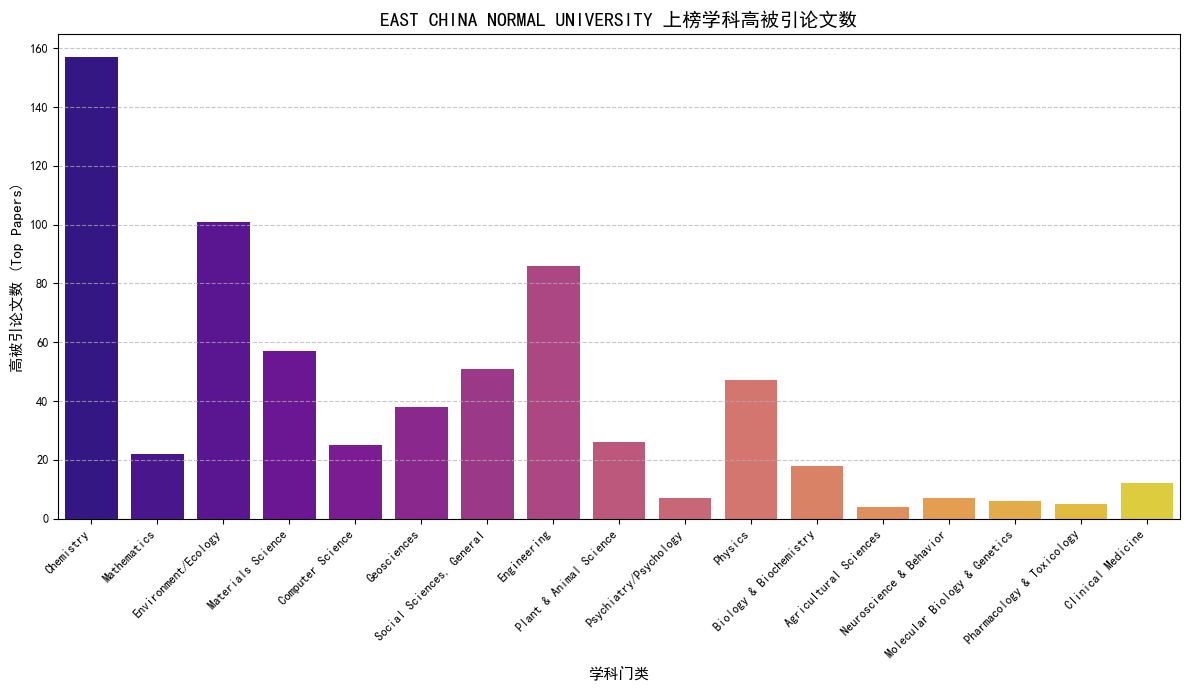


--- 数据分析完成 ---
您可以在当前目录下找到生成的图片文件：
- discipline_on_list_overview.png
- discipline_rankings.png
- discipline_cites_per_paper.png
- discipline_top_papers.png


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False 

# --- 1. 定义常量和配置 ---
UNIVERSITY_NAME = "EAST CHINA NORMAL UNIVERSITY" 
DISCIPLINES = [
    "Agricultural Sciences", "Biology & Biochemistry", "Chemistry",
    "Clinical Medicine", "Computer Science", "Economics & Business",
    "Engineering", "Environment/Ecology", "Geosciences", "Immunology",
    "Materials Science", "Mathematics", "Microbiology",
    "Molecular Biology & Genetics", "Multidisciplinary",
    "Neuroscience & Behavior", "Pharmacology & Toxicology", "Physics",
    "Plant & Animal Science", "Psychiatry/Psychology",
    "Social Sciences, General", "Space Science"
]

file_mapping = {}
file_mapping[DISCIPLINES[0]] = "IndicatorsExport.csv" 
for i in range(1, len(DISCIPLINES)):
    file_mapping[DISCIPLINES[i]] = f"IndicatorsExport ({i}).csv"

READ_PROCESSED_FILES = True 
PROCESSED_FILE_SUFFIX = "_processed.csv" 

if READ_PROCESSED_FILES:
    for disc, fname in file_mapping.items():
        base_name, _ = os.path.splitext(fname)
        file_mapping[disc] = base_name + PROCESSED_FILE_SUFFIX 

results = []

print("--- 华东师范大学学科竞争力数据分析 ---")
print(f"目标大学: {UNIVERSITY_NAME}")
print(f"分析学科数量: {len(DISCIPLINES)}")
print(f"正在读取文件: {'处理后的文件' if READ_PROCESSED_FILES else '原始文件'}")
print("-" * 40)

# --- 2. 数据收集与预处理函数 ---
def process_discipline_data(discipline_name, file_path):
    """
    处理单个学科的CSV文件，查找目标大学的数据。
    现在假定文件已预处理，第一行是header，其中第一列是'Rank'，第二列是'Institutions'。
    """
    
    if not os.path.exists(file_path):
        print(f"警告: 文件 '{file_path}' 不存在，跳过 {discipline_name}。")
        return {
            'Discipline': discipline_name,
            'On_List': False,
            'Rank': None,
            'Web of Science Documents': None,
            'Cites': None,
            'Cites/Paper': None,
            'Top Papers': None,
            'Total_Institutions_in_List': None
        }

    try:
        df = pd.read_csv(file_path, encoding='latin1') 
        
        df.columns = df.columns.str.strip()
        
        new_columns = []
        for col in df.columns:
            if 'rank' in col.lower():
                new_columns.append('Rank')
            elif 'institutions' in col.lower():
                new_columns.append('Institutions')
            elif 'countries/regions' in col.lower() or 'countries' in col.lower():
                new_columns.append('Countries/Regions')
            elif 'web of science documents' in col.lower() or 'web of sc' in col.lower():
                new_columns.append('Web of Science Documents')
            elif 'cites/paper' in col.lower() or 'cites/pap' in col.lower():
                new_columns.append('Cites/Paper')
            elif 'top papers' in col.lower() or 'top pape' in col.lower():
                new_columns.append('Top Papers')
            elif 'cites' in col.lower(): 
                new_columns.append('Cites')
            else:
                new_columns.append(col)
        df.columns = new_columns

        required_columns = ['Rank', 'Institutions', 'Web of Science Documents', 'Cites', 'Cites/Paper', 'Top Papers']
        if not all(col in df.columns for col in required_columns):
            print(f"错误: 文件 '{file_path}' 缺少必要的列。现有列: {df.columns.tolist()}")
            return {
                'Discipline': discipline_name,
                'On_List': False,
                'Rank': None,
                'Web of Science Documents': None,
                'Cites': None,
                'Cites/Paper': None,
                'Top Papers': None,
                'Total_Institutions_in_List': None
            }

        df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce').fillna(0).astype(int)
        df = df[df['Rank'] > 0] 
        
        df['Institutions_Clean'] = df['Institutions'].astype(str).str.upper().str.strip()
        target_university_clean = UNIVERSITY_NAME.upper().strip()
        
        university_data = df[df['Institutions_Clean'].str.contains(target_university_clean, na=False)]

        total_institutions = len(df) 
        
        if not university_data.empty:
            data = university_data.iloc[0]
            print(f"  在 {discipline_name} (文件: {os.path.basename(file_path)}) 中找到 {UNIVERSITY_NAME}，排名: {int(data['Rank'])}")
            return {
                'Discipline': discipline_name,
                'On_List': True,
                'Rank': int(data['Rank']),
                'Web of Science Documents': int(data['Web of Science Documents']),
                'Cites': int(data['Cites']),
                'Cites/Paper': float(data['Cites/Paper']),
                'Top Papers': int(data['Top Papers']),
                'Total_Institutions_in_List': total_institutions
            }
        else:
            print(f"  在 {discipline_name} (文件: {os.path.basename(file_path)}) 中未找到 {UNIVERSITY_NAME} (不在前 {total_institutions} 名)。")
            return {
                'Discipline': discipline_name,
                'On_List': False,
                'Rank': None,
                'Web of Science Documents': None,
                'Cites': None,
                'Cites/Paper': None,
                'Top Papers': None,
                'Total_Institutions_in_List': total_institutions
            }
    except Exception as e:
        print(f"处理文件 '{file_path}' 时发生错误: {e}")
        return {
            'Discipline': discipline_name,
            'On_List': False,
            'Rank': None,
            'Web of Science Documents': None,
            'Cites': None,
            'Cites/Paper': None,
            'Top Papers': None,
            'Total_Institutions_in_List': None
        }

# --- 3. 执行数据收集循环 ---
for disc in DISCIPLINES:
    file_to_process = file_mapping.get(disc)
    if not file_to_process:
        print(f"错误: 未找到学科 '{disc}' 对应的文件名，请检查 file_mapping。")
        continue

    print(f"正在处理学科: {disc} (文件: {file_to_process})...")
    result = process_discipline_data(disc, file_to_process)
    results.append(result)
df_results = pd.DataFrame(results)

print("-" * 40)
print("\n数据收集完成。\n")

# --- 4. 打印汇总结果 ---
print("--- 华东师范大学学科表现汇总 ---")
display(df_results) 

print("\n--- 关键指标概览 ---")
on_list_disciplines_count = df_results[df_results['On_List']].shape[0]
not_on_list_disciplines_count = total_disciplines_evaluated - on_list_disciplines_count
total_disciplines_evaluated = df_results.shape[0]
print(f"在 {total_disciplines_evaluated} 个分析学科中，华东师范大学有 {on_list_disciplines_count} 个学科上榜，{not_on_list_disciplines_count} 个学科未上榜。")

df_on_list = df_results[df_results['On_List']].sort_values(by='Rank').copy()

if not df_on_list.empty:
    print("\n--- 华东师范大学上榜学科详细数据 ---")
    display(df_on_list[['Discipline', 'Rank', 'Total_Institutions_in_List', 'Web of Science Documents', 'Cites', 'Cites/Paper', 'Top Papers']])

    best_rank_discipline = df_on_list.loc[df_on_list['Rank'].idxmin()]
    print(f"\n排名最优学科：'{best_rank_discipline['Discipline']}'，在该学科中排名第 {best_rank_discipline['Rank']} 位 (总计 {best_rank_discipline['Total_Institutions_in_List']} 个机构)。")
    print(f"  WOS文档数: {best_rank_discipline['Web of Science Documents']}, 引用数: {best_rank_discipline['Cites']}, 篇均引用: {best_rank_discipline['Cites/Paper']:.2f}, 高被引论文数: {best_rank_discipline['Top Papers']}")

    best_cites_per_paper_discipline = df_on_list.loc[df_on_list['Cites/Paper'].idxmax()]
    print(f"\n篇均引用最高学科：'{best_cites_per_paper_discipline['Discipline']}'，篇均引用达到 {best_cites_per_paper_discipline['Cites/Paper']:.2f}。")
    print(f"  排名: {best_cites_per_paper_discipline['Rank']} (总计 {best_cites_per_paper_discipline['Total_Institutions_in_List']} 个机构), WOS文档数: {best_cites_per_paper_discipline['Web of Science Documents']}, 引用数: {best_cites_per_paper_discipline['Cites']}, 高被引论文数: {best_cites_per_paper_discipline['Top Papers']}")

    best_top_papers_discipline = df_on_list.loc[df_on_list['Top Papers'].idxmax()]
    print(f"\n高被引论文数最多学科：'{best_top_papers_discipline['Discipline']}'，高被引论文数达到 {best_top_papers_discipline['Top Papers']} 篇。")
    print(f"  排名: {best_top_papers_discipline['Rank']} (总计 {best_top_papers_discipline['Total_Institutions_in_List']} 个机构), WOS文档数: {best_top_papers_discipline['Web of Science Documents']}, 引用数: {best_top_papers_discipline['Cites']}, 篇均引用: {best_top_papers_discipline['Cites/Paper']:.2f}")

else:
    print("\n华东师范大学在本次分析的所有学科中均未上榜。")

# --- 5. 生成可视化图表 ---

print("\n--- 正在生成可视化图表... ---")
# 1. 学科上榜情况概览图
plt.figure(figsize=(8, 5))

plot_data = pd.DataFrame({
    '状态': ['未上榜', '上榜'],
    '学科数量': [not_on_list_disciplines_count, on_list_disciplines_count]
})

sns.barplot(x='状态', y='学科数量', data=plot_data, 
            palette=['lightcoral', 'lightgreen'], hue='状态', legend=False) # 使用明确的 '状态' 列作为 hue

plt.title(f'{UNIVERSITY_NAME} 学科上榜情况概览', fontsize=14)
plt.xlabel('是否上榜', fontsize=11)
plt.ylabel('学科数量', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('discipline_on_list_overview.png')
plt.show()
plt.close()

if not df_on_list.empty:
    # 2. 上榜学科排名图
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Discipline', y='Rank', data=df_on_list, palette='viridis', hue='Discipline', legend=False)
    plt.title(f'{UNIVERSITY_NAME} 上榜学科排名', fontsize=14)
    plt.xlabel('学科门类', fontsize=11)
    plt.ylabel('排名', fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('discipline_rankings.png')
    plt.show()
    plt.close()

    # 3. 上榜学科篇均引用图
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Discipline', y='Cites/Paper', data=df_on_list, palette='magma', hue='Discipline', legend=False)
    plt.title(f'{UNIVERSITY_NAME} 上榜学科篇均引用', fontsize=14)
    plt.xlabel('学科门类', fontsize=11)
    plt.ylabel('篇均引用 (Cites/Paper)', fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('discipline_cites_per_paper.png')
    plt.show()
    plt.close()

    # 4. 上榜学科高被引论文数图
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Discipline', y='Top Papers', data=df_on_list, palette='plasma', hue='Discipline', legend=False)
    plt.title(f'{UNIVERSITY_NAME} 上榜学科高被引论文数', fontsize=14)
    plt.xlabel('学科门类', fontsize=11)
    plt.ylabel('高被引论文数 (Top Papers)', fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(fontsize=9)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('discipline_top_papers.png')
    plt.show()
    plt.close()
else:
    print("华东师范大学没有上榜学科，因此不生成具体学科的排名、篇均引用和高被引论文数图。")

print("- discipline_on_list_overview.png")
if not df_on_list.empty:
    print("- discipline_rankings.png")
    print("- discipline_cites_per_paper.png")
    print("- discipline_top_papers.png")
